### **Calculate elevation difference maps by the generated aster dems.**
This notebook is partly corresponding to the scripts/dems_df_map.py.


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from utils.geotif_io import readTiff
from utils.lay_stack import lay_stack
from pprint import pprint
from utils.crop2extent import get_img_extent, img2extent



### **1. Check the multitemporal aster dem.**

In [3]:
### Multitemporal dems data
tile_lat, tile_lon = '30', '95'
# years = ['2003','2004','2005', '2006','2007','2008']
years = ['2006','2007','2008', '2009', '2018','2019','2020','2021']
path_dems = ['data/aster-stereo/SETP-%s/tiles-dem/tile-%s-%s/dems_mosaic_subs.tif' % (year, tile_lat, tile_lon) for year in years]
path_nodata = 'data/aster-stereo/tiles-nodata/tile_%s_%s.tif' % (tile_lat, tile_lon) 
path_dems = [ path_dem if os.path.exists(path_dem) else path_nodata for path_dem in path_dems ]
### Auxilary data: srtm and glacier mask
path_srtm = 'data/dem-data/srtm-c/tiles/tile_%s_%s.tif' % (tile_lat, tile_lon)
### merge into one paths list
# paths_img = [path_srtm] + [path_glacier] + path_dems
paths_img = [path_srtm] + path_dems
paths_img



['data/dem-data/srtm-c/tiles/tile_30_95.tif',
 'data/aster-stereo/SETP-2006/tiles-dem/tile-30-95/dems_mosaic_subs.tif',
 'data/aster-stereo/SETP-2007/tiles-dem/tile-30-95/dems_mosaic_subs.tif',
 'data/aster-stereo/SETP-2008/tiles-dem/tile-30-95/dems_mosaic_subs.tif',
 'data/aster-stereo/SETP-2009/tiles-dem/tile-30-95/dems_mosaic_subs.tif',
 'data/aster-stereo/SETP-2018/tiles-dem/tile-30-95/dems_mosaic_subs.tif',
 'data/aster-stereo/SETP-2019/tiles-dem/tile-30-95/dems_mosaic_subs.tif',
 'data/aster-stereo/SETP-2020/tiles-dem/tile-30-95/dems_mosaic_subs.tif',
 'data/aster-stereo/SETP-2021/tiles-dem/tile-30-95/dems_mosaic_subs.tif']

Images layer stacking done.
number of the dems:  8


Text(0.5, 1.0, 'aster dem_7')

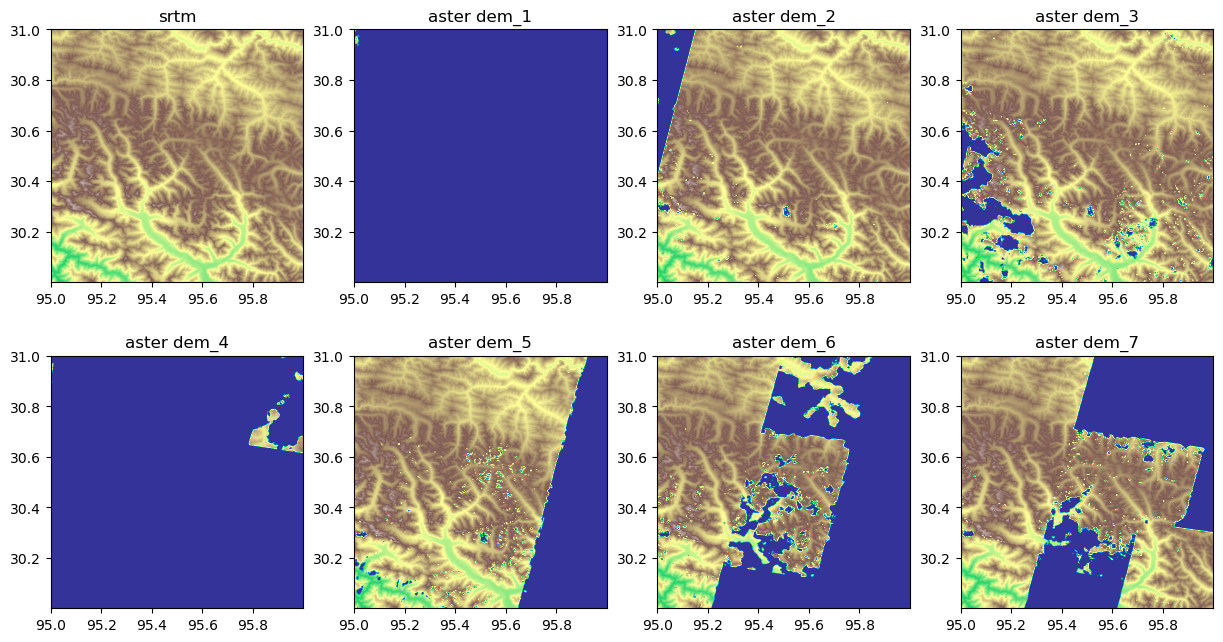

In [4]:
path_dems_laysta = 'dems_laysta.tif'
lay_stack(path_imgs=paths_img, path_out=path_dems_laysta, extent_mode='img_1', res=None)
dems_laysta, dems_info = readTiff(path_dems_laysta)
os.remove(path_dems_laysta)
num_dems = dems_laysta.shape[-1]-1
print('number of the dems: ', num_dems)
### check the layer stacked image. 
plt.figure(figsize=(15,12))
plt.subplot(3,4,1); plt.imshow(dems_laysta[:,:,0], vmax=7000, vmin=1, extent=dems_info['geoextent'], cmap='terrain'); plt.title('srtm')
plt.subplot(3,4,2); plt.imshow(dems_laysta[:,:,1], vmax=7000, vmin=1, extent=dems_info['geoextent'], cmap='terrain'); plt.title('aster dem_1')
plt.subplot(3,4,3); plt.imshow(dems_laysta[:,:,2], vmax=7000, vmin=1, extent=dems_info['geoextent'], cmap='terrain'); plt.title('aster dem_2')
plt.subplot(3,4,4); plt.imshow(dems_laysta[:,:,3], vmax=7000, vmin=1, extent=dems_info['geoextent'], cmap='terrain'); plt.title('aster dem_3')
plt.subplot(3,4,5); plt.imshow(dems_laysta[:,:,4], vmax=7000, vmin=1, extent=dems_info['geoextent'], cmap='terrain'); plt.title('aster dem_4')
plt.subplot(3,4,6); plt.imshow(dems_laysta[:,:,5], vmax=7000, vmin=1, extent=dems_info['geoextent'], cmap='terrain'); plt.title('aster dem_5')
plt.subplot(3,4,7); plt.imshow(dems_laysta[:,:,6], vmax=7000, vmin=1, extent=dems_info['geoextent'], cmap='terrain'); plt.title('aster dem_6')
plt.subplot(3,4,8); plt.imshow(dems_laysta[:,:,7], vmax=7000, vmin=1, extent=dems_info['geoextent'], cmap='terrain'); plt.title('aster dem_7')




### **2. Check the difference maps between aster dems and srtm.** 

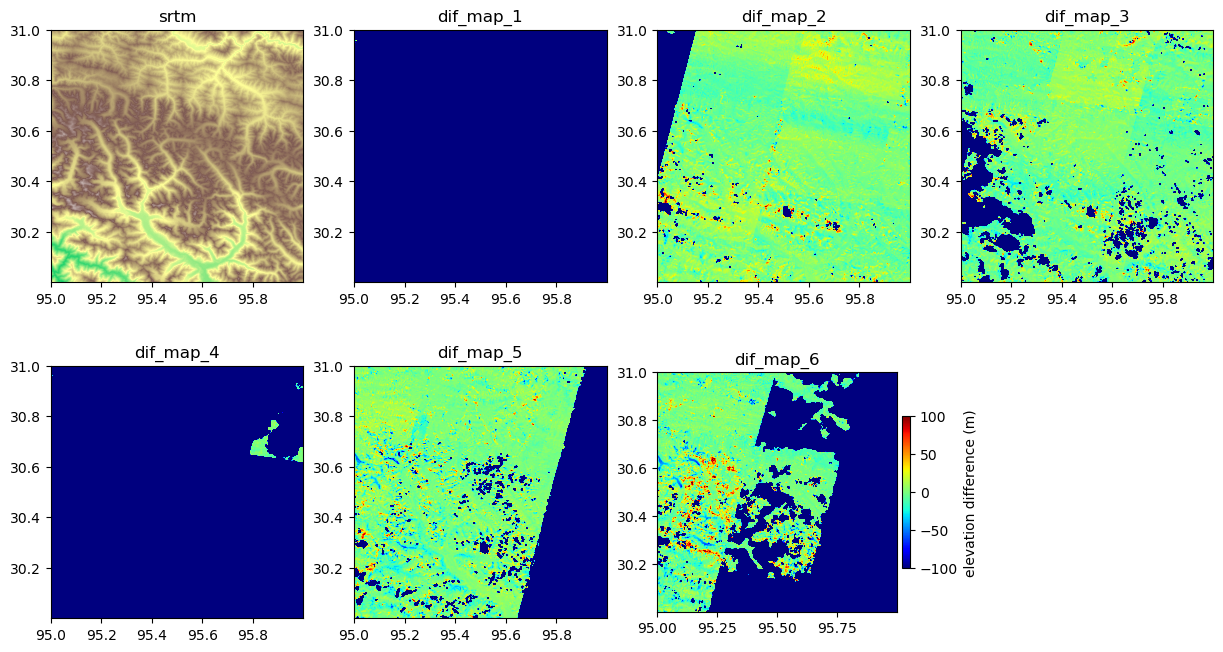

In [5]:
### calculate dems difference map
dems_dif_map = np.zeros_like(dems_laysta[:,:,0:num_dems])
for i in range(num_dems):
  dems_dif_map[:,:,i] = dems_laysta[:,:,i+1]-dems_laysta[:,:,0]  # calculate dems diffference.

### check the dems difference map
plt.figure(figsize=(15,8))
plt.subplot(2,4,1); plt.imshow(dems_laysta[:,:,0], vmax=7000, vmin=0, extent=dems_info['geoextent'], cmap='terrain');plt.title('srtm')
plt.subplot(2,4,2); plt.imshow(dems_dif_map[:,:,0], vmax=100, vmin=-100, extent=dems_info['geoextent'], cmap='jet');plt.title('dif_map_1')
plt.subplot(2,4,3); plt.imshow(dems_dif_map[:,:,1], vmax=100, vmin=-100, extent=dems_info['geoextent'], cmap='jet');plt.title('dif_map_2')
plt.subplot(2,4,4); plt.imshow(dems_dif_map[:,:,2], vmax=100, vmin=-100, extent=dems_info['geoextent'], cmap='jet');plt.title('dif_map_3')
plt.subplot(2,4,5); plt.imshow(dems_dif_map[:,:,3], vmax=100, vmin=-100, extent=dems_info['geoextent'], cmap='jet');plt.title('dif_map_4')
plt.subplot(2,4,6); plt.imshow(dems_dif_map[:,:,4], vmax=100, vmin=-100, extent=dems_info['geoextent'], cmap='jet');plt.title('dif_map_5')
plt.subplot(2,4,7); plt.imshow(dems_dif_map[:,:,5], vmax=100, vmin=-100, extent=dems_info['geoextent'], cmap='jet');plt.title('dif_map_6')
cb = plt.colorbar(fraction=0.03, pad=0.02)
cb.set_label('elevation difference (m)')



### **3. Analysis for the glacier region.**

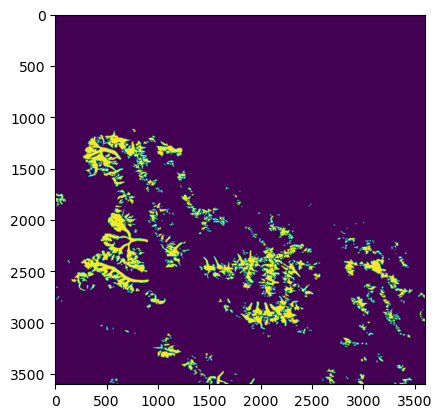

In [6]:
path_glacier='data/land-cover/rgi60/tiles/tile_%s_%s.tif' % (tile_lat, tile_lon)
extent, espg_code = get_img_extent(path_srtm)
glacier_mask = img2extent(path_img=path_glacier, extent=extent, size_target=dems_laysta.shape[0:2], path_save=None)
plt.imshow(glacier_mask)


#### **3.1 glacier mask for dems.**

In [7]:
### mask out the non-glacier region and nodata region
glacier_mask_3d = np.dstack([glacier_mask]*dems_dif_map.shape[-1])
dems_dif_map_glacier = np.ma.masked_where(np.logical_or(glacier_mask_3d == 0, dems_laysta[:,:,1:] == 0), dems_dif_map)
dems_dif_map_glacier.shape



(3600, 3600, 8)

#### **3.2 Remove the outlier data.**
##### Outliers: elevation difference > 150.


In [18]:
dems_dif_map_glacier_filter = dems_dif_map_glacier.copy()
for i_dem in range(num_dems):
    print('Processing dem changes map %d' % (i_dem+1))
    dems_dif_map_glacier_filter[:,:,i_dem] = np.ma.masked_where(np.logical_or(dems_dif_map_glacier_filter[:,:,i_dem]>150, \
                                            dems_dif_map_glacier_filter[:,:,i_dem]<-150), dems_dif_map_glacier_filter[:,:,i_dem])   


Processing dem changes map 1
Processing dem changes map 2
Processing dem changes map 3
Processing dem changes map 4
Processing dem changes map 5
Processing dem changes map 6
Processing dem changes map 7
Processing dem changes map 8


Text(0.5, 1.0, 'dems_dif_map_glacier_filter')

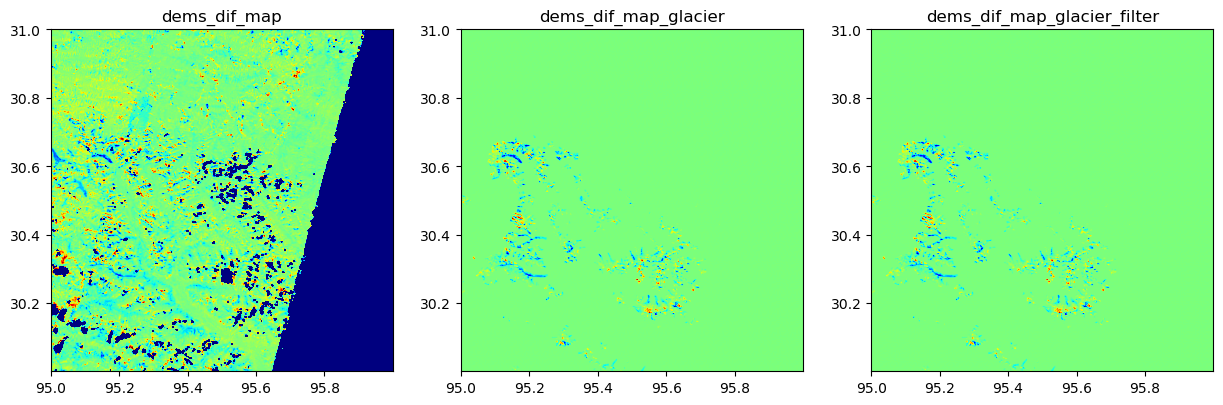

In [19]:
plt.figure(figsize=(15, 4.5))
plt.subplot(1,3,1)
plt.imshow(dems_dif_map[:,:,4], vmax=100, vmin=-100, extent=dems_info['geoextent'], cmap='jet'); plt.title('dems_dif_map')
plt.subplot(1,3,2)
plt.imshow(dems_dif_map_glacier[:,:,4].filled(0), vmax=100, vmin=-100, extent=dems_info['geoextent'], cmap='jet'); plt.title('dems_dif_map_glacier')
plt.subplot(1,3,3)
plt.imshow(dems_dif_map_glacier_filter[:,:,4].filled(0), vmax=100, vmin=-100, extent=dems_info['geoextent'], cmap='jet'); plt.title('dems_dif_map_glacier_filter')



#### **3.3 Statistic of the elevation differencd of the glacier region.**


In [20]:
### Calculate the average value and standard deviation of the elevation difference
for i_dem in range(num_dems):
    print('mean:', np.mean(dems_dif_map_glacier_filter[:,:,i_dem]), ' sigma: ', np.std(dems_dif_map_glacier_filter[:,:,i_dem]))


mean: --  sigma:  --
mean: -1.1012438320473388  sigma:  18.177563597107856
mean: -0.6077512766403156  sigma:  23.619355570940776
mean: --  sigma:  --
mean: -6.878926710116211  sigma:  32.571874996490415
mean: 0.6479791448454751  sigma:  45.62031364025053
mean: -0.6336294645840421  sigma:  39.78488158389093
mean: -10.86173524918774  sigma:  29.312250934449054


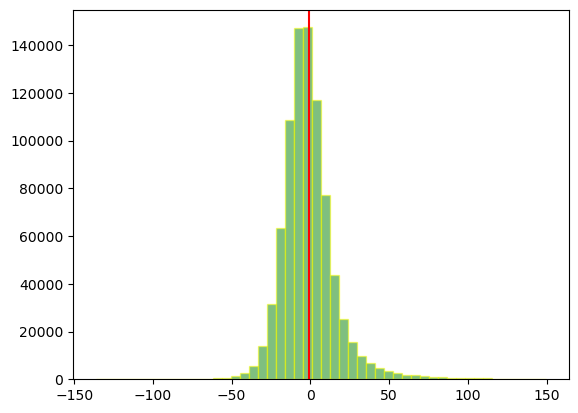

In [21]:
##### Plot the histogram of elevation differences.
i_dem = 1
id_valid = np.where(dems_dif_map_glacier_filter[:,:,i_dem].mask == False)
n, bins, patches = plt.hist(dems_dif_map_glacier_filter[:,:,i_dem][id_valid], \
                                    bins=50, lw=1, ec="yellow", fc="green", alpha=0.5)
plt.axvline(x = np.mean(dems_dif_map_glacier_filter[:,:,i_dem]), color = 'r', label = 'axvline - full height')



### **4. Analysis for the stable region.**

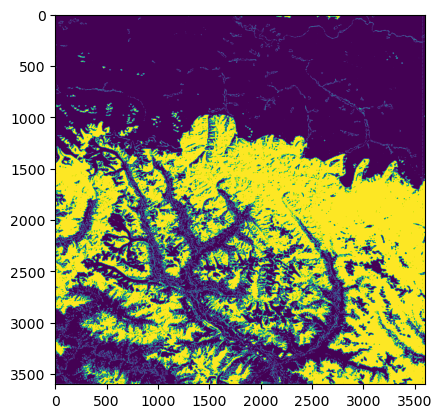

In [22]:
path_stable='data/land-cover/stable-cover/tiles-2010/tile_%s_%s.tif' % (tile_lat, tile_lon)
extent, espg_code = get_img_extent(path_srtm)
stable_mask = img2extent(path_img=path_stable, extent=extent, size_target=dems_laysta.shape[0:2], path_save=None)
plt.imshow(stable_mask)


#### **4.1 glacier mask for dems.**

In [23]:
### mask out the non-glacier and nodata region
stable_mask_3d = np.dstack([stable_mask]*dems_dif_map.shape[-1])
dems_dif_map_stable = np.ma.masked_where(np.logical_or(stable_mask_3d == 0, dems_laysta[:,:,1:] == 0), dems_dif_map)
dems_dif_map_stable.shape


(3600, 3600, 8)

#### **4.2 Remove the outlier data.**
##### Outliers: elevation difference > 150.

In [26]:
dems_dif_map_stable_filter = dems_dif_map_stable.copy()
for i_dem in range(num_dems):
# for i_dem in range(1,2):
    print('Processing dem changes map %d' % (i_dem+1))
    dems_dif_map_stable_filter[:,:,i_dem]=np.ma.masked_where(np.logical_or(dems_dif_map_stable_filter[:,:,i_dem]>150, \
                                            dems_dif_map_stable_filter[:,:,i_dem]<-150), dems_dif_map_stable_filter[:,:,i_dem])  


Processing dem changes map 1
Processing dem changes map 2
Processing dem changes map 3
Processing dem changes map 4
Processing dem changes map 5
Processing dem changes map 6
Processing dem changes map 7
Processing dem changes map 8


Text(0.5, 1.0, 'dems_dif_map_stable_filter')

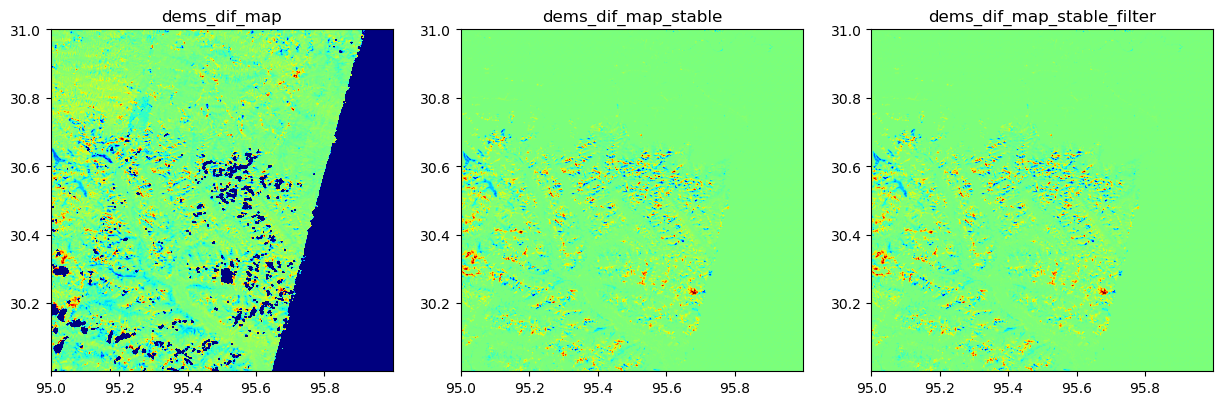

In [27]:
plt.figure(figsize=(15, 4.5))
plt.subplot(1,3,1)
plt.imshow(dems_dif_map[:,:,4], vmax=100, vmin=-100, extent=dems_info['geoextent'], cmap='jet'); plt.title('dems_dif_map')
plt.subplot(1,3,2)
plt.imshow(dems_dif_map_stable[:,:,4].filled(0), vmax=100, vmin=-100, extent=dems_info['geoextent'], cmap='jet'); plt.title('dems_dif_map_stable')
plt.subplot(1,3,3)
plt.imshow(dems_dif_map_stable_filter[:,:,4].filled(0), vmax=100, vmin=-100, extent=dems_info['geoextent'], cmap='jet'); plt.title('dems_dif_map_stable_filter')



#### **4.3 Statistic of the elevation differencd of the stable region.**


In [28]:
### Calculate the average value and standard deviation of the elevation difference
for i_dem in range(num_dems):
    print('mean:', np.mean(dems_dif_map_stable_filter[:,:,i_dem]), ' sigma: ', np.std(dems_dif_map_stable_filter[:,:,i_dem]))



mean: -20.36949831940407  sigma:  55.9303248279417
mean: 2.2549255037388534  sigma:  18.384736276332276
mean: 1.5738304596931414  sigma:  18.362976644946592
mean: 1.2760496031266124  sigma:  17.5021083128456
mean: 1.6371569390009544  sigma:  26.217234809648172
mean: 6.036862548789425  sigma:  32.86900695033006
mean: 3.587072700856601  sigma:  26.104039238465266
mean: 0.2884814918269735  sigma:  21.631611370698494


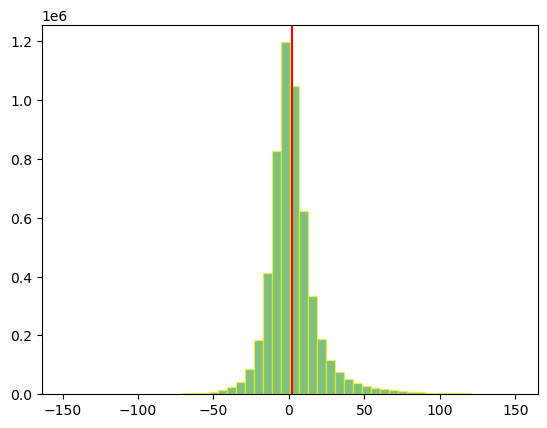

In [30]:
##### Plot the histogram of elevation differences.
i_dem = 1
id_valid = np.where(dems_dif_map_stable_filter[:,:,i_dem].mask == False)
n, bins, patches = plt.hist(dems_dif_map_stable_filter[:,:,i_dem][id_valid], \
                                    bins=50, lw=1, ec="yellow", fc="green", alpha=0.5)
plt.axvline(x = np.mean(dems_dif_map_stable_filter[:,:,i_dem]), color = 'r', label = 'axvline - full height')
